In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import math

In [2]:
Fs = 1000
f = 1000
sample = 10
t = np.arange(0,1.0,0.001)
x = np.arange(0,1,1.0/sample)
y = np.random.normal(0,0.5,sample) + np.sin(2*np.pi*x*f/Fs)

In [3]:
degree = 9
z = np.polyfit(x,y,degree)
func = np.poly1d(z)
x_new = np.linspace(x[0],x[-1],50)
y_new = func(x_new)

(0, 0.9)

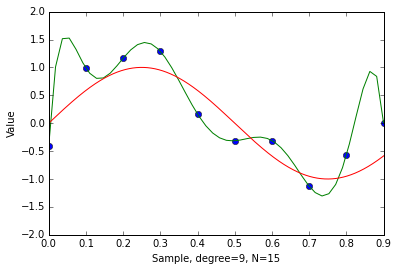

In [4]:
%matplotlib inline
plt.plot(x,y,'o',x_new, y_new, t, np.sin(2*np.pi*t*f/Fs))
plt.xlabel('Sample, degree=9, N=15')
plt.ylabel('Value')
pylab.ylim([-2,2])
pylab.xlim([0,0.9])

In [40]:
from sklearn import linear_model

In [135]:
def compute_feature(x):
    X = []
    X = np.zeros((x.size,10))
    for i in np.arange(0, x.size):
        for j in np.arange(0, 10):
            X[i][j] = pow(x[i],j)
    return X

<function matplotlib.pyplot.show>

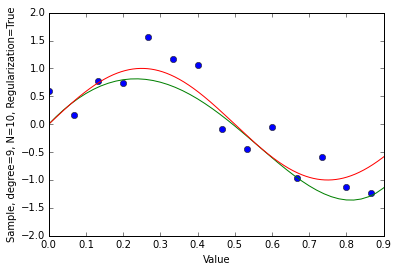

In [143]:
X = compute_feature(x)
model = linear_model.Lasso(alpha=0.00001)
model.fit(X,y)
x_regularized = np.arange(0,1,0.02)
X_regularized = compute_feature(x_regularized)
Y_regularized = np.dot(X_regularized, model.coef_)
plt.plot(x, y,'o',x_regularized, Y_regularized, t, np.sin(2*np.pi*t*f/Fs))
plt.xlabel('Value')
plt.ylabel('Sample, degree=9, N=10, Regularization=True')
pylab.ylim([-2,2])
pylab.xlim([0,0.9])
plt.show